<a href="https://colab.research.google.com/github/vidjaydas/Data_Science_Python/blob/main/Regularization_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ridge, Lasso, Elastic Net

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
#print(boston_dataset.DESCR)

In [4]:
#Load the data and divide into X and Y variable
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House price'] = pd.Series(boston_pd_target)

# Input
X = boston_pd.iloc[:, :-1]

#Output
Y = boston_pd.iloc[:,-1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS  ...  PTRATIO       B  LSTAT  House price
0  0.00632  18.0   2.31   0.0  ...     15.3  396.90   4.98         24.0
1  0.02731   0.0   7.07   0.0  ...     17.8  396.90   9.14         21.6
2  0.02729   0.0   7.07   0.0  ...     17.8  392.83   4.03         34.7
3  0.03237   0.0   2.18   0.0  ...     18.7  394.63   2.94         33.4
4  0.06905   0.0   2.18   0.0  ...     18.7  396.90   5.33         36.2

[5 rows x 14 columns]


In [5]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(boston_pd.iloc[:,:-1],
                                                    boston_pd.iloc[:, -1],
                                                    test_size=0.25)

(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

((379, 13), (127, 13), (379,), (127,))

In [8]:
#Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

#Generate Prediction on test set
lreg_y_pred = lreg.predict(X_test)

#Calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - Y_test)**2)
print('Mean Squared Error on test set : ', mean_squared_error)

#Putting together the coefficient and their corresponding variable names

lreg_coefficient = pd.DataFrame()
lreg_coefficient['Columns'] = X_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean Squared Error on test set :  21.974160958573112
    Columns  Coefficient Estimate
0      CRIM             -0.115252
1        ZN              0.043812
2     INDUS              0.062918
3      CHAS              2.384692
4       NOX            -17.077788
5        RM              3.867993
6       AGE              0.001307
7       DIS             -1.305714
8       RAD              0.306194
9       TAX             -0.011795
10  PTRATIO             -1.005796
11        B              0.009566
12    LSTAT             -0.560927


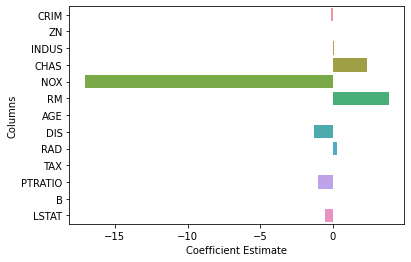

In [12]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate', y='Columns', data=lreg_coefficient)

#Ridge

In [14]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)     #if we change the alpha value, accuracy will change
ridgeR.fit(X_train, Y_train)
y_pred = ridgeR.predict(X_test)

# Calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - Y_test)**2)
print(mean_squared_error_ridge)

#Get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient['Columns'] = X_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

22.401657156509653
    Columns  Coefficient Estimate
0      CRIM             -0.110283
1        ZN              0.044048
2     INDUS              0.031270
3      CHAS              2.316070
4       NOX             -8.715117
5        RM              3.930628
6       AGE             -0.007517
7       DIS             -1.200112
8       RAD              0.279695
9       TAX             -0.012367
10  PTRATIO             -0.927083
11        B              0.009947
12    LSTAT             -0.568613


#Lasso

In [15]:
from sklearn.linear_model import Lasso

#Train the model
lasso = Lasso(alpha = 1)
lasso.fit(X_train, Y_train)
y_pred1 = lasso.predict(X_test)

#Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - Y_test)**2)
print('Mean Squared error on test set', mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff['Columns'] = X_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean Squared error on test set 26.970364146322694
    Columns  Coefficient Estimate
0      CRIM             -0.068219
1        ZN              0.044564
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.949504
6       AGE              0.018672
7       DIS             -0.627346
8       RAD              0.258789
9       TAX             -0.014448
10  PTRATIO             -0.802934
11        B              0.008416
12    LSTAT             -0.779422


#ElasticNet

In [26]:
#import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = .1, l1_ratio = 0.5)
e_net.fit(X_train, Y_train)

# Calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_test)
mean_squared_error = np.mean((y_pred_elastic - Y_test)**2)
print('Mean Square Error on test set', mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff['Columns'] = X_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Square Error on test set 23.724494982101852


,Columns,Coefficient Estimate
0,CRIM,-0.105440
1,ZN,0.046679
2,INDUS,-0.000000
3,CHAS,0.930012
4,NOX,-0.000000
5,RM,3.312497
6,AGE,-0.009718
7,DIS,-1.066537
8,RAD,0.276970
9,TAX,-0.014198
